# Simulación del Examen (Core)

## Fundamentos de Data Science – Práctica para el Examen

### Contexto:

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

### Requisitos:

1) Limpieza de Datos:

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

* Identificar y abordar cualquier valor duplicado.
* Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
* Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
* Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
* Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

2) Exploración de Datos:

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

* Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


### Diccionario de Datos:

* user_id: Identificación única del usuario.
* app_version: Versión de la aplicación usada.
* platform: Plataforma del dispositivo (Android, iOS).
* session_duration: Duración de la sesión en minutos.
* number_of_sessions: Número de sesiones en un día.
* country: País del usuario.
* user_feedback: Puntuación de la experiencia del usuario (1-5).

### Generamos los datos

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [19]:


# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
# data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [20]:
df = pd.read_csv('user_app_data.csv')

### Sacamos las primeras impresiones del dataset

In [21]:
print(df.shape)
print("-----------------------")
print(df.info())


(300, 7)
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB
None


In [22]:
df.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


In [23]:
df.describe()

,user_id,app_version,session_duration,number_of_sessions,user_feedback
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,1.155000,95.840000,9.596667,2.926667
std,86.746758,0.113363,51.922773,5.672853,1.449699
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,75.750000,1.100000,51.250000,5.000000,2.000000
50%,150.500000,1.200000,100.500000,9.000000,3.000000
75%,225.250000,1.300000,141.250000,15.000000,4.000000
max,300.000000,1.300000,179.000000,19.000000,5.000000


### Limpieza de Datos:

Contamos si hay nulos

In [24]:
df.isnull().sum()

user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64

In [25]:
#Verificar si en cada columna estan los datos correctos
#En este caso vamos a convertir todo a minuscula para solucionar eso.

# Extraer la columna 'platform' en una nueva variable
platform = df['platform']

# Definir los valores válidos
platforms_valida = {'Android', 'iOS'}

# Verificar si hay entradas no válidas
entrada_invalida = platform[~platform.isin(platforms_valida)]

# Mostrar entradas no válidas si las hay
if not entrada_invalida.empty:
    print("Se encontraron errores en la columna 'platform':")
    print(entrada_invalida)
else:
    print("Todos los datos en 'platform' son válidos.")


Todos los datos en 'platform' son válidos.


### Slicing

Filtramos por plataformas y pais

In [26]:
Sesiones = df.groupby(['platform', 'country']).agg({
    'session_duration': 'sum', 
    'number_of_sessions': 'sum'
}).reset_index()
print(Sesiones)
Sesiones.shape

   platform  country  session_duration  number_of_sessions
0   Android   Canada              1041                 127
1   Android   France              1947                 233
2   Android  Germany              1505                 130
3   Android    Italy              1494                 200
4   Android   Mexico              1109                 167
5   Android    Spain              2180                 219
6   Android       UK              1287                 153
7   Android      USA              1650                 179
8       iOS   Canada              2254                 190
9       iOS   France              1498                 140
10      iOS  Germany              2579                 189
11      iOS    Italy              1676                 164
12      iOS   Mexico              2492                 215
13      iOS    Spain              2096                 187
14      iOS       UK              2112                 222
15      iOS      USA              1832                 1

(16, 4)

In [27]:
Sesiones

,platform,country,session_duration,number_of_sessions
0,Android,Canada,1041,127
1,Android,France,1947,233
2,Android,Germany,1505,130
3,Android,Italy,1494,200
4,Android,Mexico,1109,167
5,Android,Spain,2180,219
6,Android,UK,1287,153
7,Android,USA,1650,179
8,iOS,Canada,2254,190
9,iOS,France,1498,140


In [28]:
Sesiones['session_duration']

0     1041
1     1947
2     1505
3     1494
4     1109
5     2180
6     1287
7     1650
8     2254
9     1498
10    2579
11    1676
12    2492
13    2096
14    2112
15    1832
Name: session_duration, dtype: int64

In [29]:
x = Sesiones['session_duration']
y = country

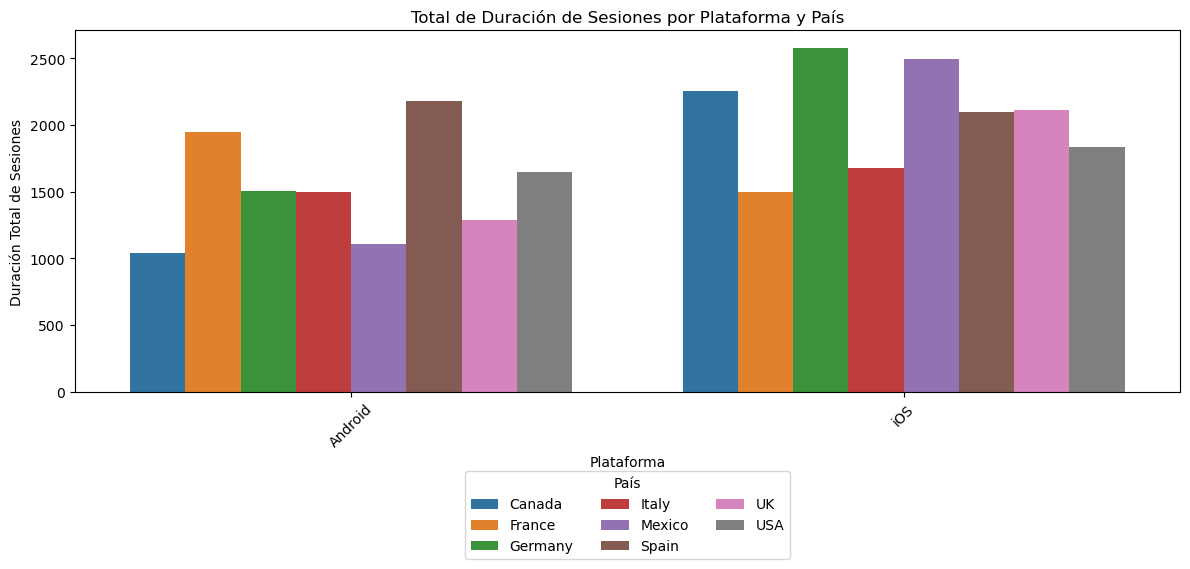

In [66]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=Sesiones, x='platform', y='session_duration', hue='country', ax=ax1)
ax1.set_title('Total de Duración de Sesiones por Plataforma y País')
ax1.set_xlabel('Plataforma')
ax1.set_ylabel('Duración Total de Sesiones')
plt.xticks(rotation=45)

# Cambiar la ubicación de la leyenda
plt.legend(title='País', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

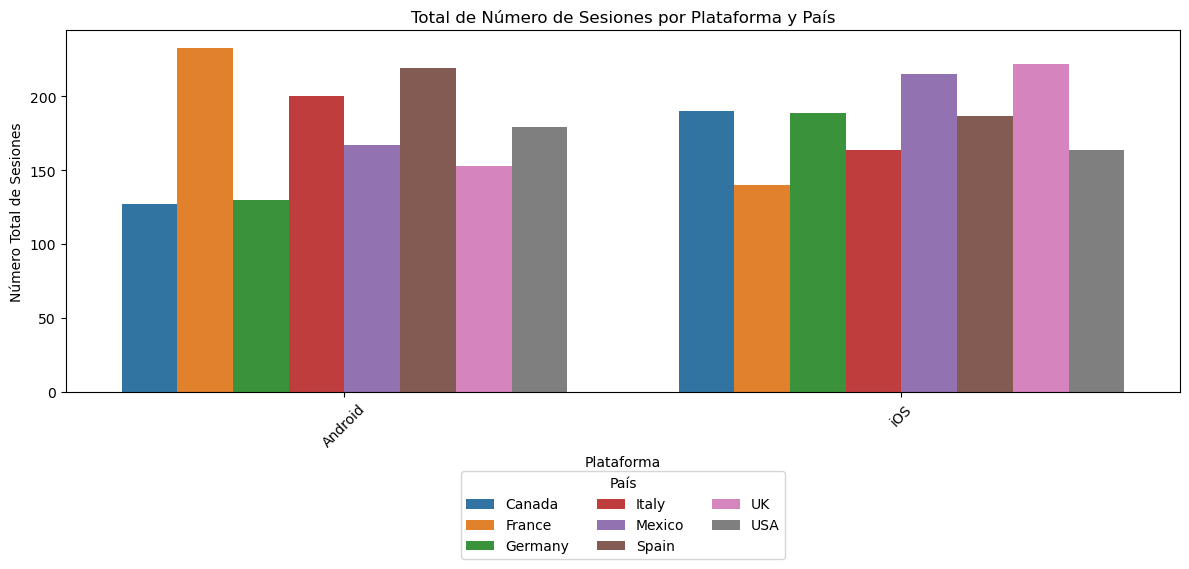

In [68]:
fig, ax2 = plt.subplots(figsize=(12, 6))
sns.barplot(data=Sesiones, x='platform', y='number_of_sessions', hue='country', ax=ax2)
ax2.set_title('Total de Número de Sesiones por Plataforma y País')
ax2.set_xlabel('Plataforma')
ax2.set_ylabel('Número Total de Sesiones')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Dividimos por las dos plataformas

In [44]:
Sesiones_platform = df.groupby(['platform',]).agg({
    'session_duration': 'sum', 
    'number_of_sessions': 'sum'
}).reset_index()
print(Sesiones_platform)


  platform  session_duration  number_of_sessions
0  Android             12213                1408
1      iOS             16539                1471


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
Sesiones_platform2 = df.groupby(['platform',]).agg({
    'session_duration': 'mean', 
    'number_of_sessions': 'mean'
}).reset_index()
print(Sesiones_platform2)



  platform  session_duration  number_of_sessions
0  Android         89.145985           10.277372
1      iOS        101.466258            9.024540


correlacion

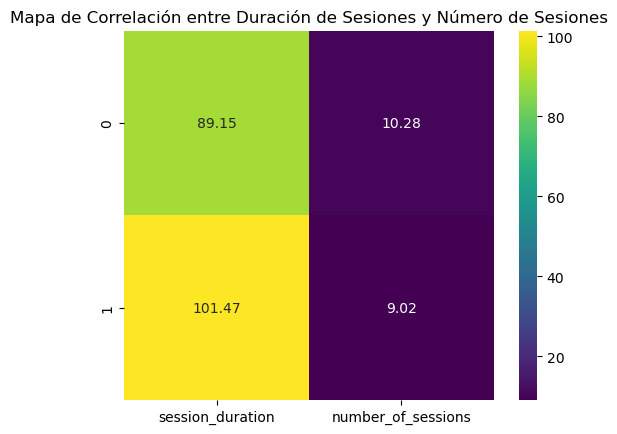

In [59]:
correlation_matrix = Sesiones_platform2[['session_duration', 'number_of_sessions']]
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Mapa de Correlación entre Duración de Sesiones y Número de Sesiones')
plt.show()

In [82]:
Sesiones = df[['session_duration', 'number_of_sessions']]
print(Sesiones)



     session_duration  number_of_sessions
0                 109                  11
1                 116                  17
2                  94                  13
3                  47                   1
4                  99                   2
..                ...                 ...
295                33                   4
296               118                   6
297                65                   1
298               146                   5
299               177                   1

[300 rows x 2 columns]


In [27]:
array_sesiones = np.array(Sesiones)
print(array_sesiones)

[[109  11]
 [116  17]
 [ 94  13]
 [ 47   1]
 [ 99   2]
 [ 55   9]
 [168   3]
 [ 52   1]
 [144  16]
 [ 13   6]
 [114  17]
 [124   5]
 [106   5]
 [158   6]
 [147   3]
 [145   5]
 [120   5]
 [ 63  10]
 [ 19  10]
 [ 92  19]
 [ 58  17]
 [ 90  14]
 [117   9]
 [ 62  14]
 [ 23   1]
 [127  19]
 [137  13]
 [140  13]
 [129   4]
 [ 58   1]
 [122  17]
 [  1   8]
 [ 34   2]
 [ 96   8]
 [126   7]
 [118   2]
 [ 48   3]
 [ 89  18]
 [117  12]
 [129   1]
 [ 16  12]
 [ 69   5]
 [ 22  17]
 [ 93  16]
 [ 76  15]
 [154  15]
 [144   5]
 [179  14]
 [ 86   2]
 [ 29  11]
 [ 69  19]
 [ 47   7]
 [ 94   6]
 [144   2]
 [176   6]
 [ 85  18]
 [ 39   2]
 [100  18]
 [ 33  15]
 [101  19]
 [ 23   2]
 [ 10   6]
 [ 69   1]
 [100  15]
 [ 34  10]
 [138  19]
 [147  17]
 [ 96   5]
 [  1   4]
 [ 69  10]
 [  4  17]
 [ 16  10]
 [ 24  17]
 [ 80   5]
 [  2   2]
 [128   6]
 [160   2]
 [ 84  13]
 [152  11]
 [140  11]
 [178  16]
 [163  11]
 [124  19]
 [ 33  15]
 [161  16]
 [179  11]
 [171  16]
 [101   8]
 [ 12   4]
 [ 67   8]
 [ 65   4]